# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [1]:
%matplotlib inline
%pprint off

from __future__ import print_function, division
import numpy as np
from skimage import morphology

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

Pretty printing has been turned OFF


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

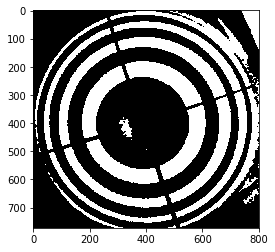

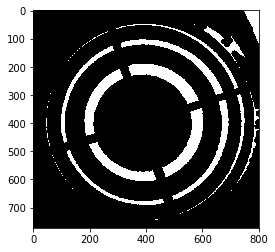

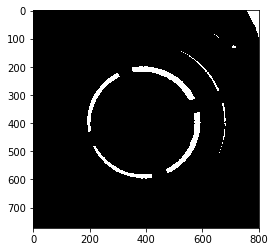

In [2]:
img_path='./images/FindingContours.png'
contour=io.imread(img_path)
ec1=morphology.erosion(contour , morphology.disk(1))
ec2=morphology.erosion(contour , morphology.disk(10))
ec3=morphology.erosion(contour , morphology.disk(20))
plt.figure
plt.imshow(ec1, cmap=plt.cm.gray)
plt.show()
plt.figure
plt.imshow(ec2, cmap=plt.cm.gray)
plt.show()
plt.figure
plt.imshow(ec3, cmap=plt.cm.gray)
plt.show()

** Q.1.2 Dilation **

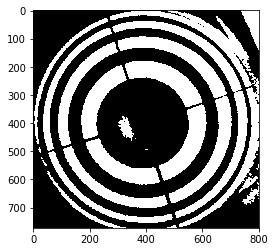

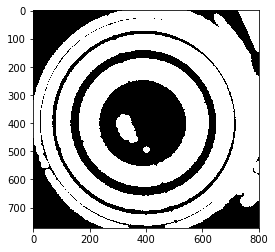

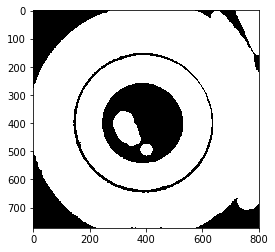

In [3]:
img_path='./images/FindingContours.png'
contour=io.imread(img_path)
dc1=morphology.dilation(contour, morphology.disk(1))
dc2=morphology.dilation(contour, morphology.disk(10))
dc3=morphology.dilation(contour, morphology.disk(20))
plt.figure
plt.imshow(dc1, cmap=plt.cm.gray)
plt.show()
plt.figure
plt.imshow(dc2, cmap=plt.cm.gray)
plt.show()
plt.figure
plt.imshow(dc3, cmap=plt.cm.gray)
plt.show()


** Q.1.3 Opening **

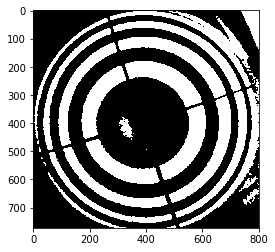

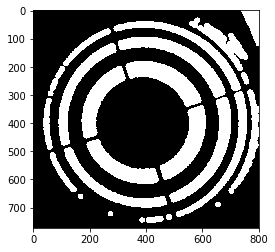

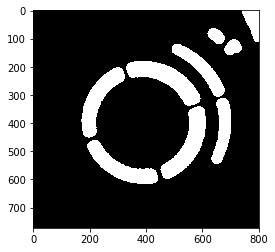

In [4]:
img_path='./images/FindingContours.png'
contour=io.imread(img_path)
oc1=morphology.opening(contour,morphology.disk(1))
oc2=morphology.opening(contour,morphology.disk(10))
oc3=morphology.opening(contour,morphology.disk(20))
plt.figure
plt.imshow(oc1, cmap=plt.cm.gray)
plt.show()
plt.figure
plt.imshow(oc2, cmap=plt.cm.gray)
plt.show()
plt.figure
plt.imshow(oc3, cmap=plt.cm.gray)
plt.show()

** Q.1.4 Closing**

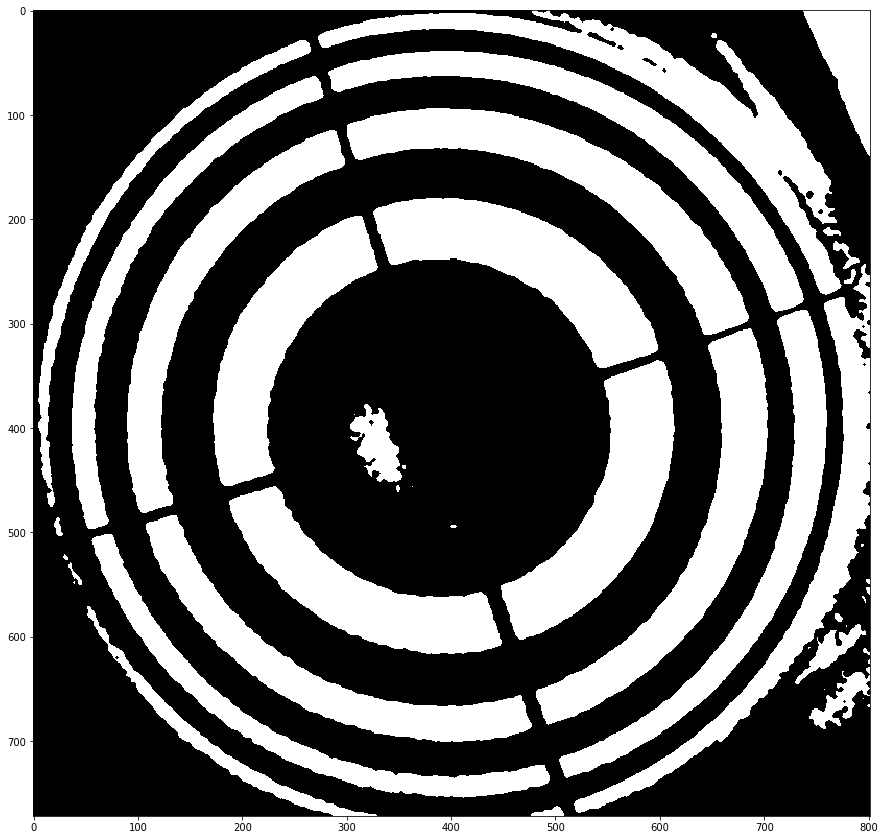

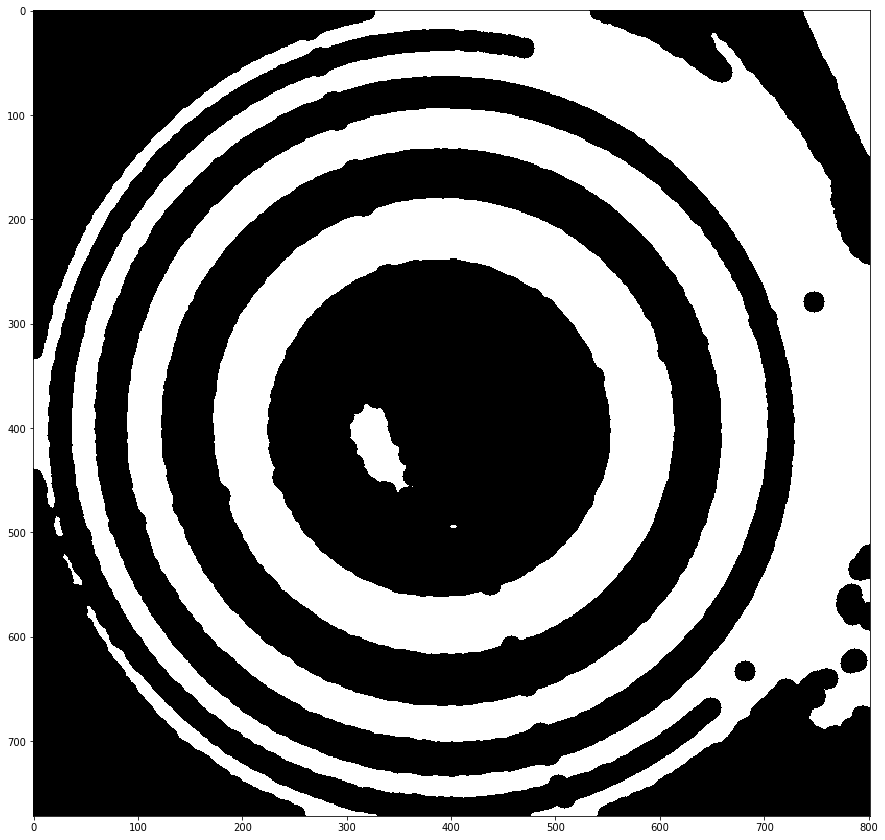

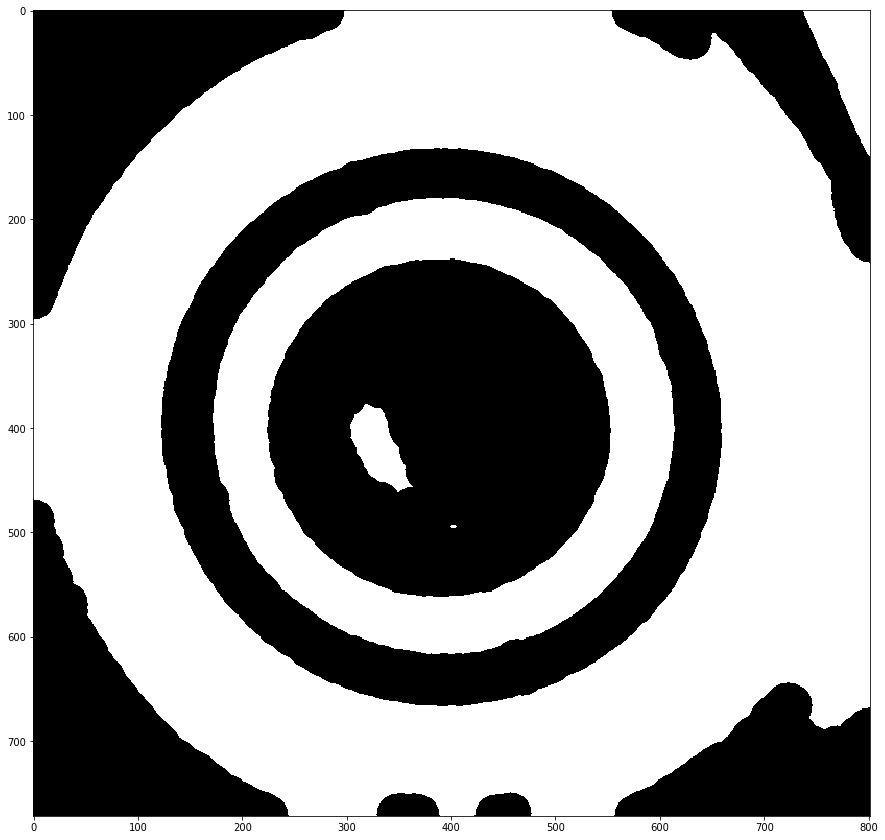

In [5]:
img_path='./images/FindingContours.png'
contour=io.imread(img_path)
cc1=morphology.closing(contour,morphology.disk(1))
cc2=morphology.closing(contour,morphology.disk(10))
cc3=morphology.closing(contour,morphology.disk(20))
plt.figure(figsize=(15,15))
plt.imshow(cc1, cmap=plt.cm.gray)
plt.show()
plt.figure(figsize=(15,15))
plt.imshow(cc2, cmap=plt.cm.gray)
plt.show()
plt.figure(figsize=(15,15))
plt.imshow(cc3, cmap=plt.cm.gray)
plt.show()

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

erosion=shrink the object;
dilation=thickening the object;
opening&closing= total of erosin and dilation;
opening=more dilation behaviour;
closing=more erosion behaviour

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

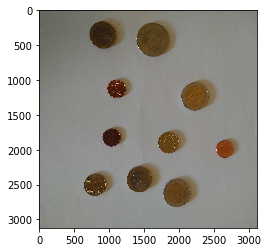

In [6]:
Path = './images/'
image_name = 'coins.jpg'
coin = io.imread(Path.__add__(image_name))
coin = img_as_ubyte(coin)
plt.figure
plt.imshow(coin, cmap=plt.cm.gray)
plt.show()



**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

/home/gulnur/Desktop/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/gulnur/Desktop/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


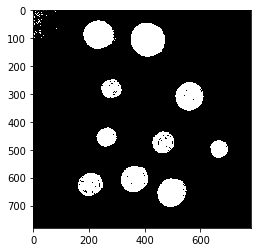

In [7]:
from skimage import filters
Path = './images/'
image_name = 'coins.jpg'
coin = io.imread(Path.__add__(image_name), as_grey=True)
coin = img_as_ubyte(coin)
coin=rescale(coin, .25)
coin = coin<=filters.threshold_otsu(coin)
plt.figure
plt.imshow(coin, cmap=plt.cm.gray)
plt.show()


**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

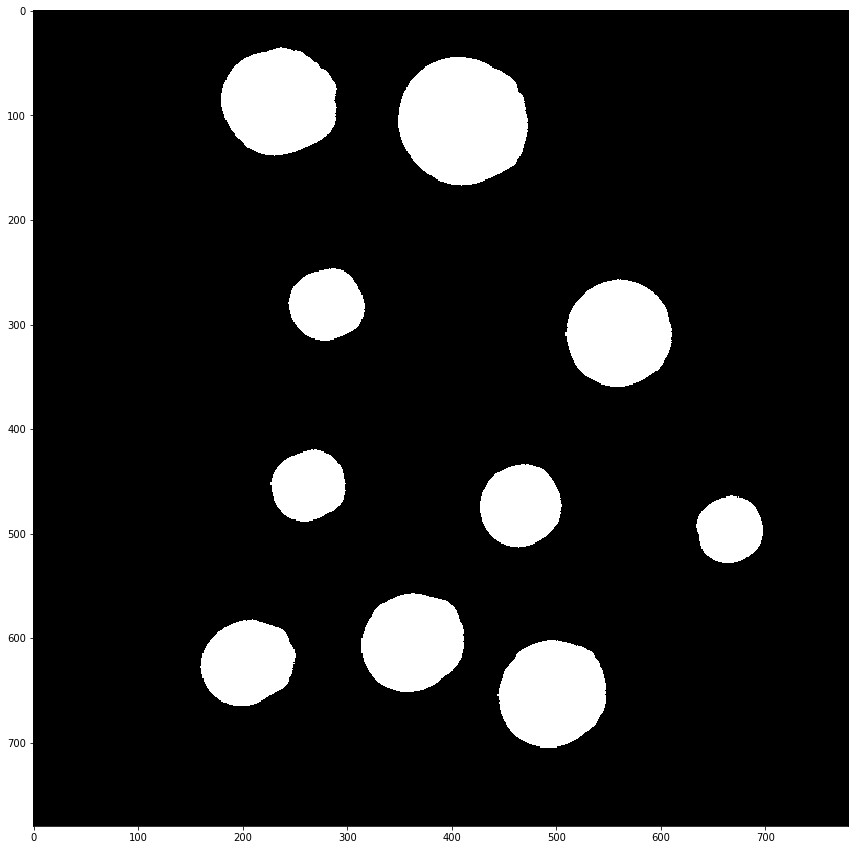

In [8]:
ec1=morphology.closing(coin , morphology.disk(2)) #if we use 1 as disk radius; still we had one dot in one of coins (poisition of the coing is like (2,2))
dc2=morphology.opening(ec1, morphology.disk(10))
plt.figure(figsize=(15,15))
plt.imshow(dc2, cmap=plt.cm.gray)
plt.show()




**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


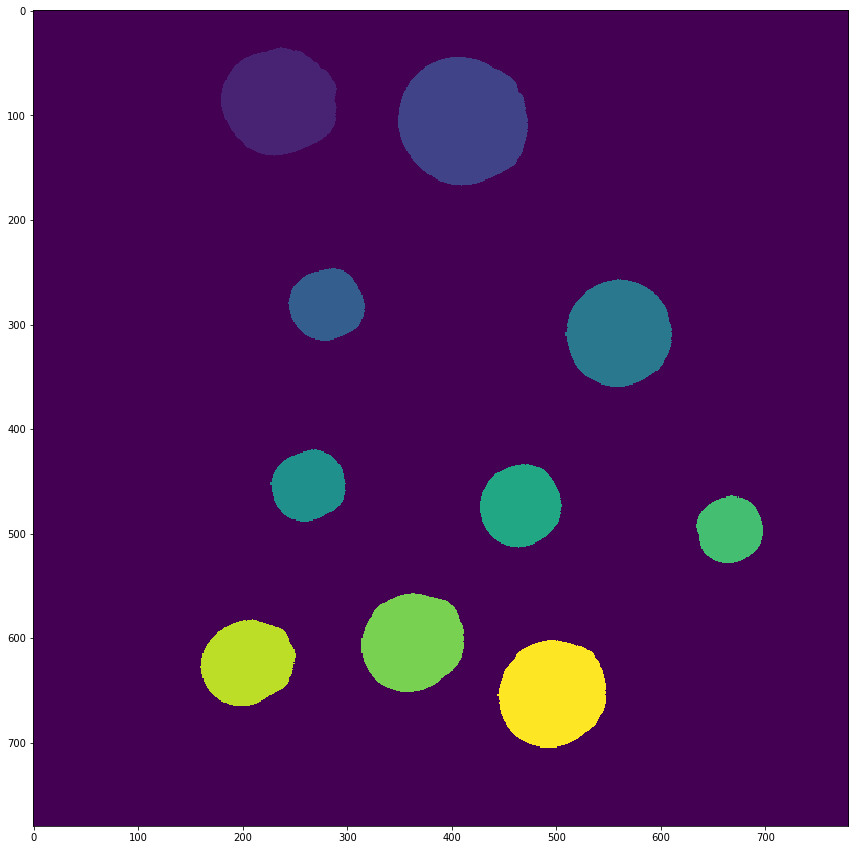

The number of regions is  10
1
The radius of the region is 62 pxs
The area of the region is 12018 pxs
2
The radius of the region is 35 pxs
The area of the region is 3910 pxs


/home/gulnur/Desktop/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


3
The radius of the region is 51 pxs
The area of the region is 8179 pxs
4
The radius of the region is 35 pxs
The area of the region is 3838 pxs
5
The radius of the region is 39 pxs
The area of the region is 4881 pxs
6
The radius of the region is 32 pxs
The area of the region is 3252 pxs
7
The radius of the region is 48 pxs
The area of the region is 7362 pxs
8
The radius of the region is 43 pxs
The area of the region is 5795 pxs
9
The radius of the region is 52 pxs
The area of the region is 8443 pxs


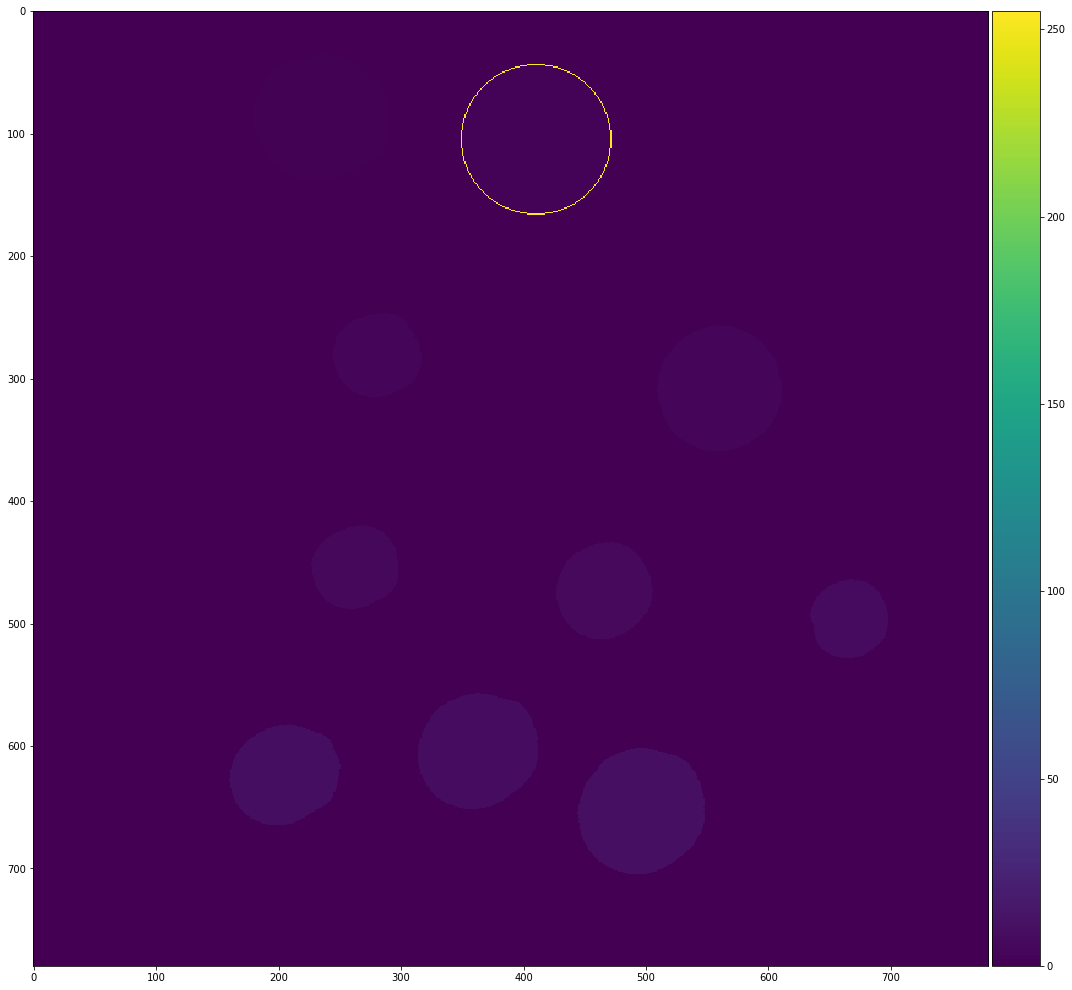

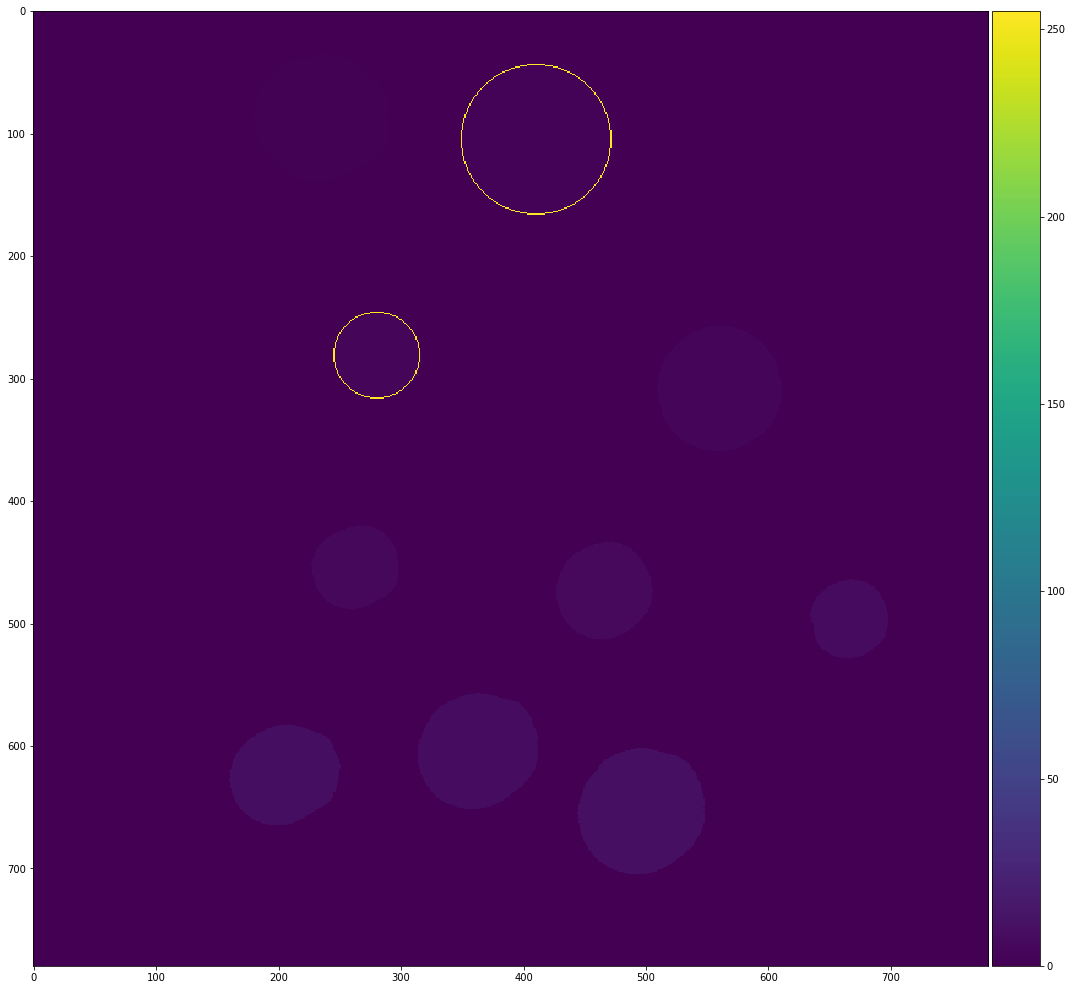

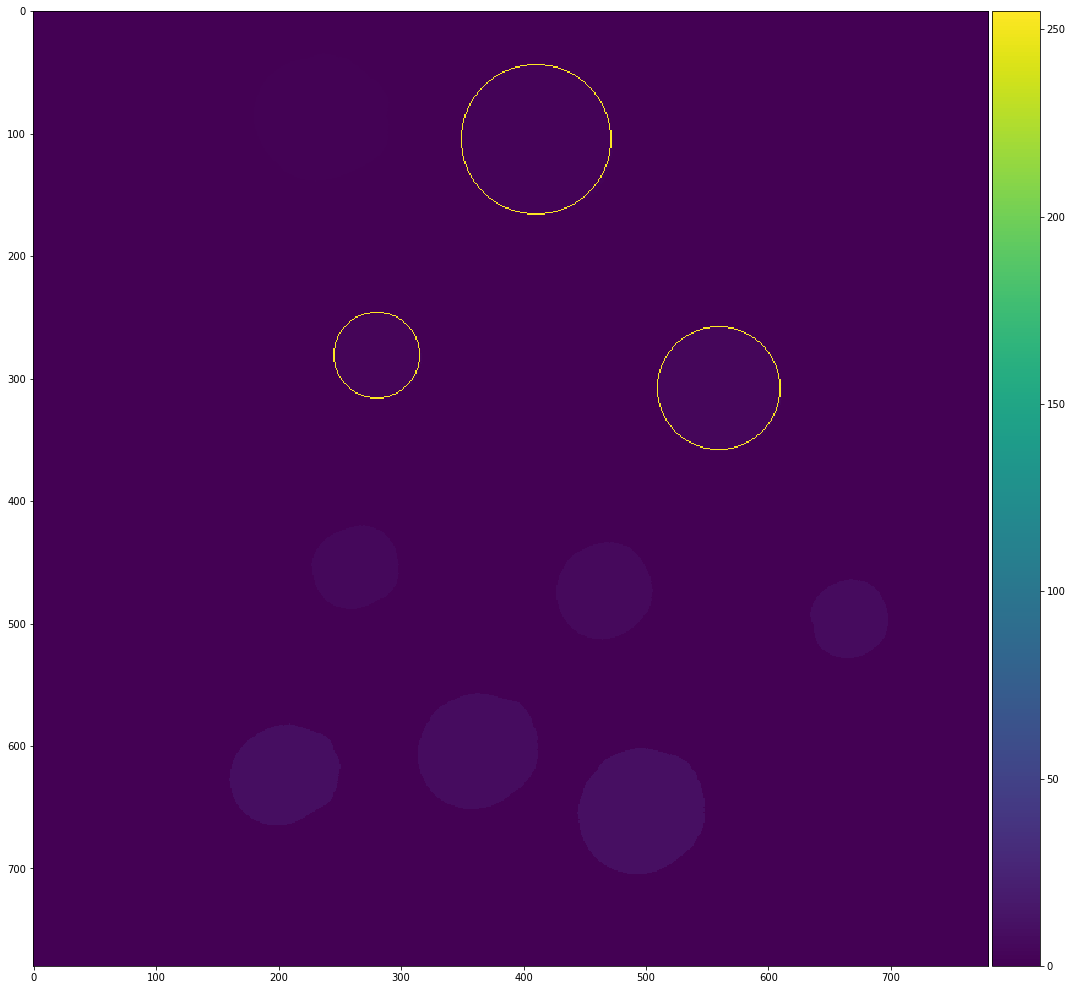

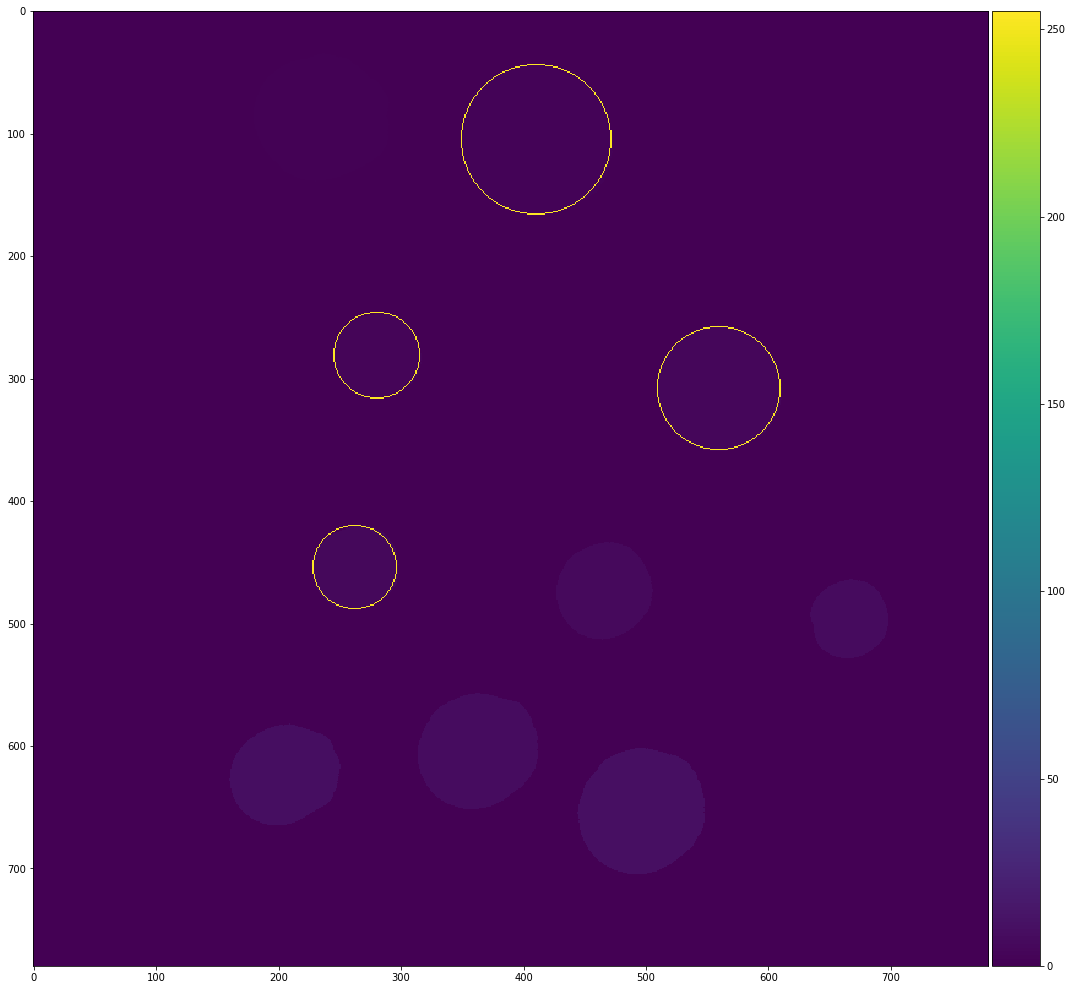

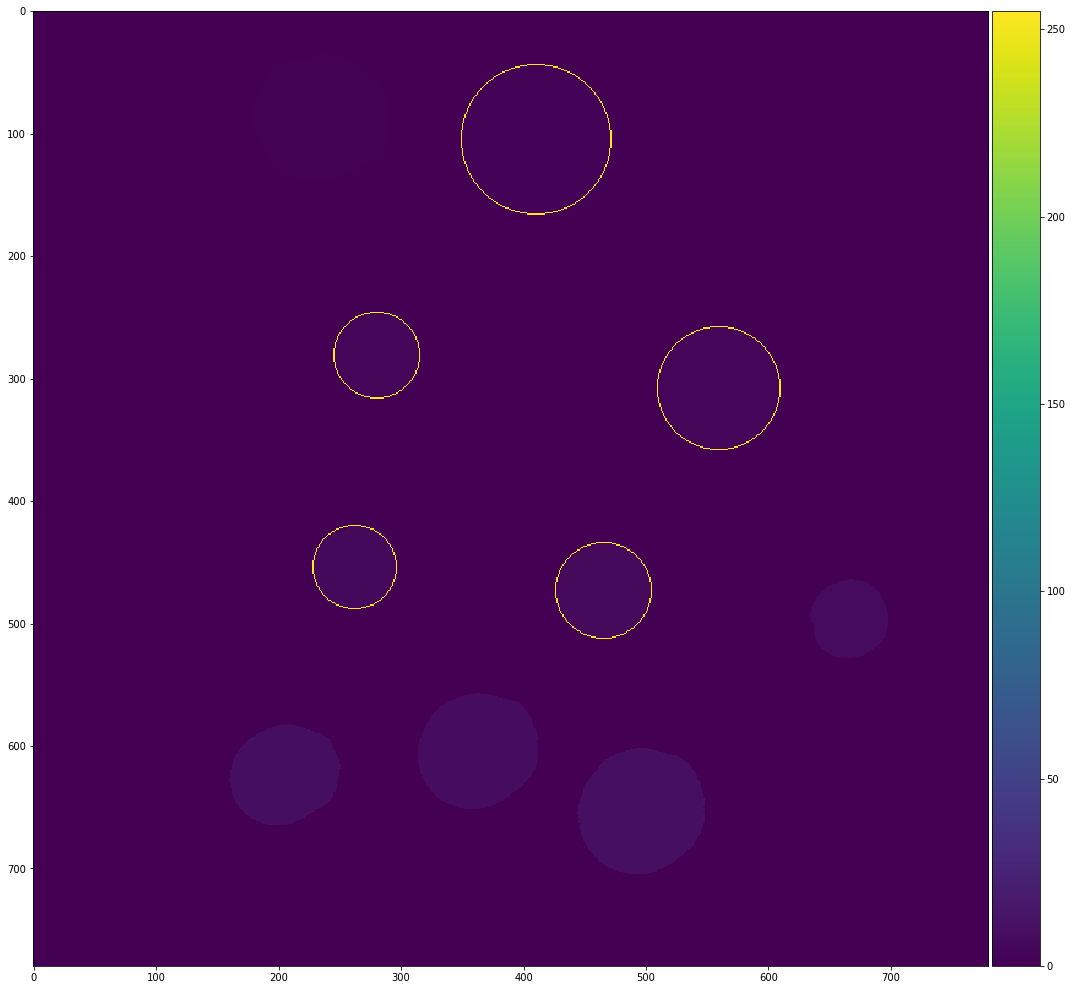

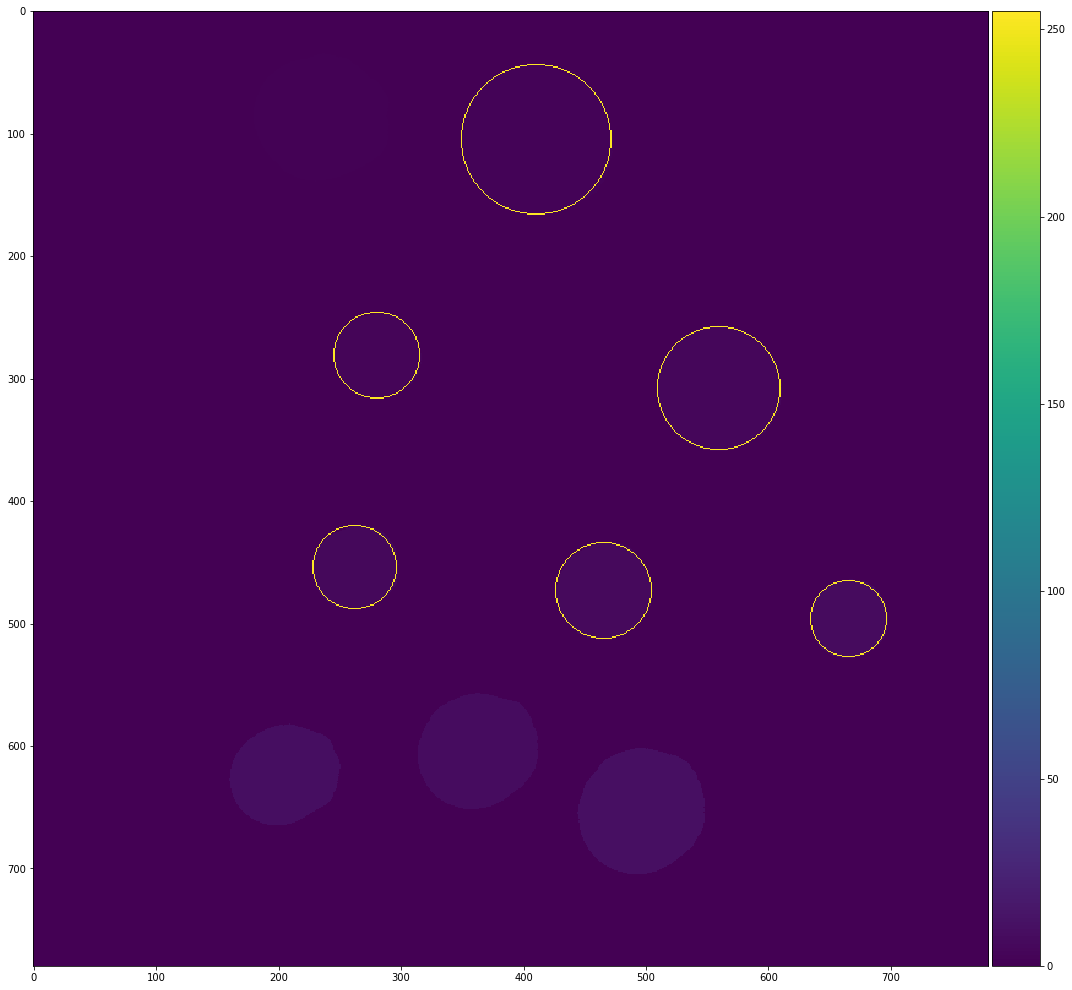

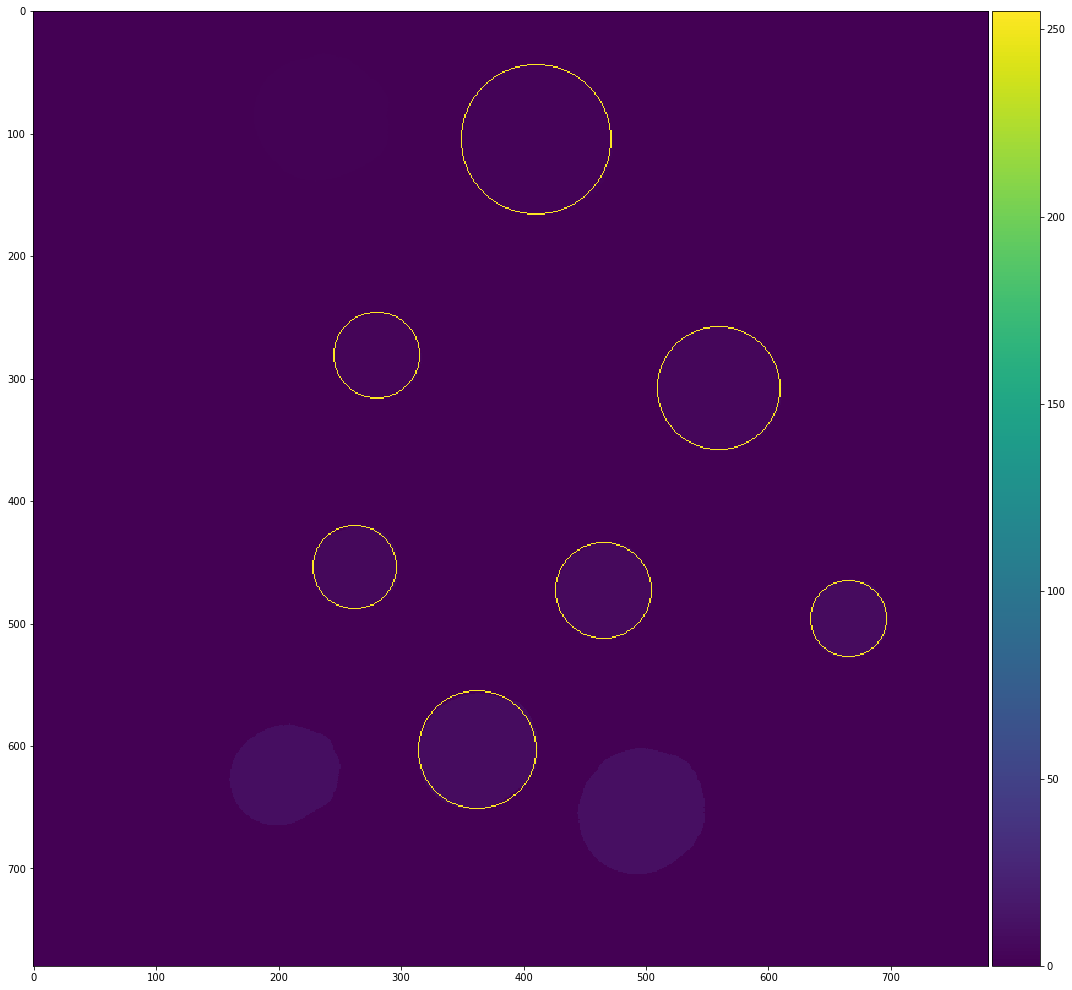

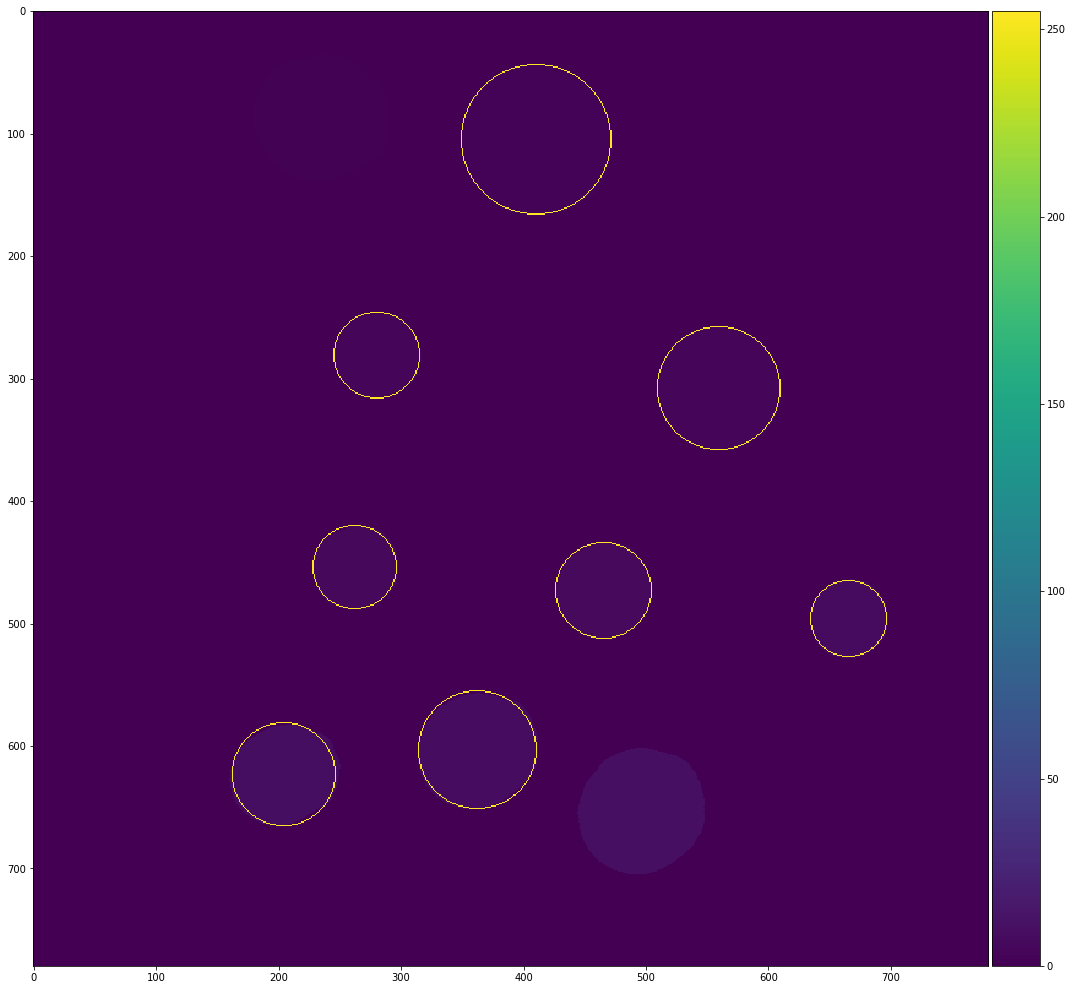

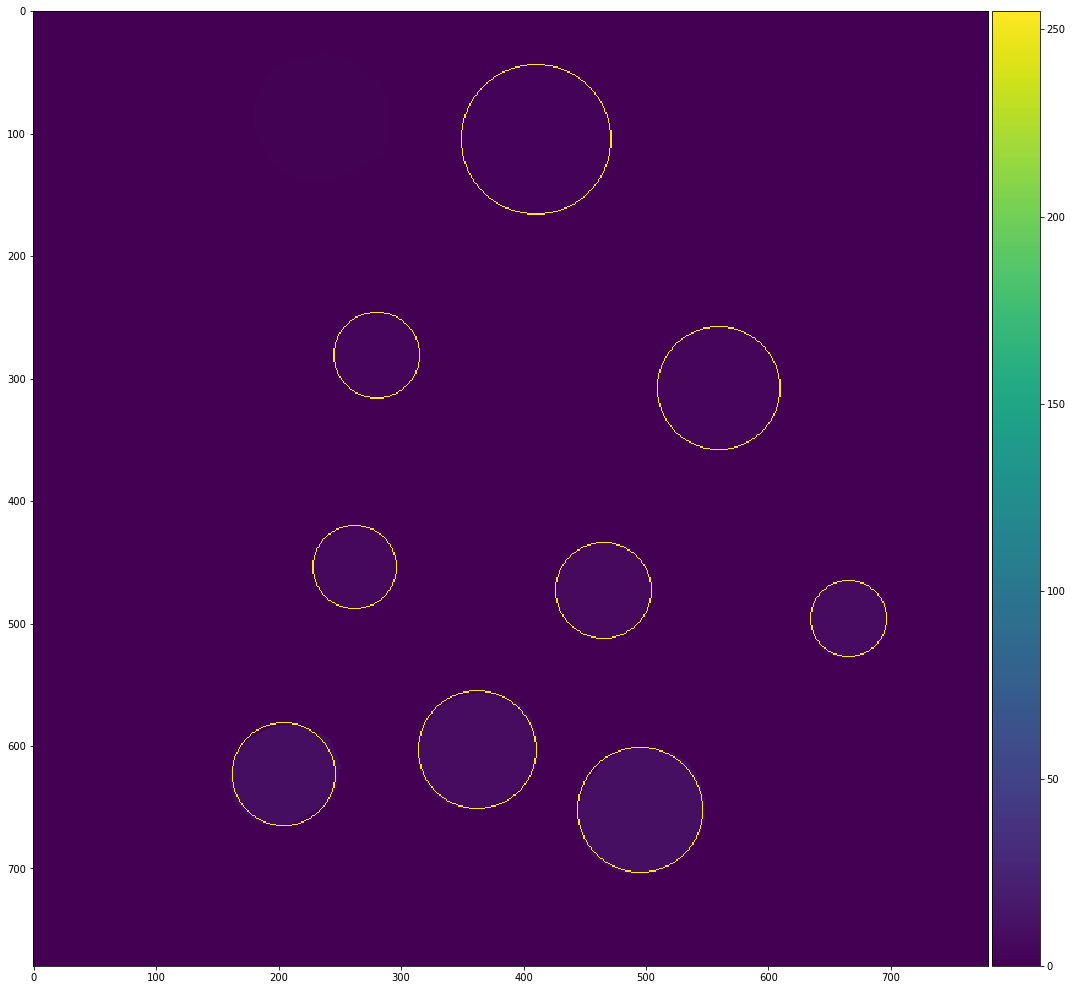

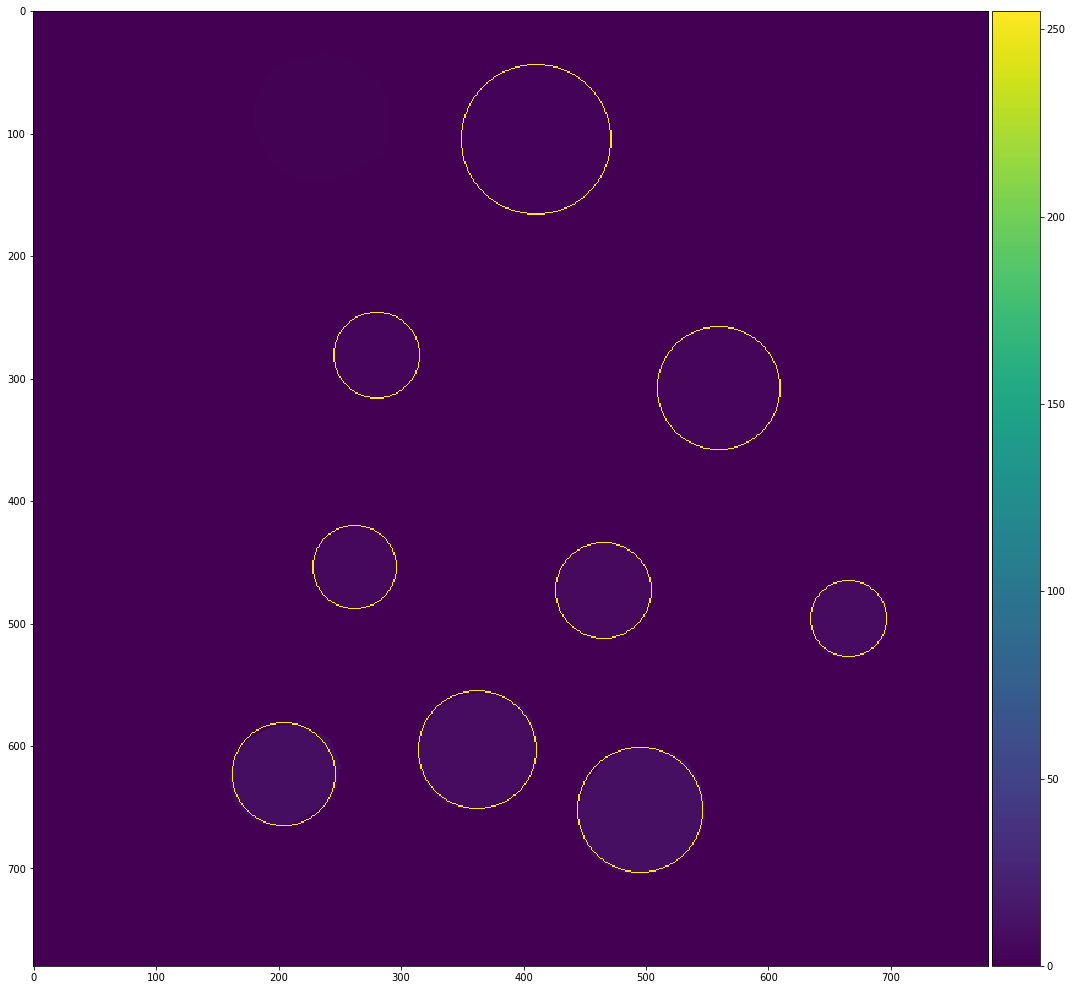

In [9]:
#question 1
from skimage import measure
lab, nlables =measure.label(dc2, return_num=True) #nlables=number of labels
plt.figure(figsize=(15,15))
plt.imshow(lab)
plt.show()
#question 2
prop=measure.regionprops(lab)
print('The number of regions is  {}'.format((nlables)))
#question 3
from skimage.draw import circle_perimeter
for idx_region, region in enumerate(prop):
    if idx_region==0:
        continue
    radius=region.equivalent_diameter/ 2.
    print(idx_region)
    print('The radius of the region is {:.0f} pxs'.format(radius))
    print('The area of the region is {:.0f} pxs'.format(region.convex_area)) 
    circle_coord=circle_perimeter(int(region.centroid[0]),int(region.centroid[1]),int(radius))
    lab[circle_coord[0],circle_coord[1]]=255
    plt.figure(figsize=(15,15))
    io.imshow(lab)
plt.figure(figsize=(15,15))
io.imshow(lab)  

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

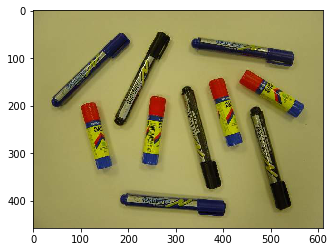

In [10]:
Path = './images/'
image_name = 'objets4.jpg'
coin = io.imread(Path.__add__(image_name))
coin = img_as_ubyte(coin)
plt.figure
plt.imshow(coin, cmap=plt.cm.gray)
plt.show()

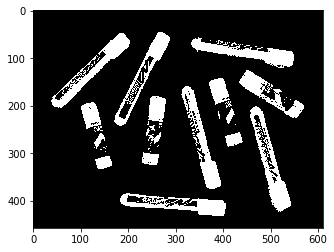

In [11]:
from skimage import filters
Path = './images/'
image_name = 'objets4.jpg'
coin= rgb2gray(coin)
coin = coin<=filters.threshold_otsu(coin)
plt.figure
plt.imshow(coin, cmap=plt.cm.gray)
plt.show()


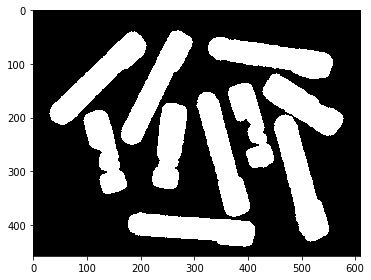

In [15]:
coin = rgb2gray(coin)
t = threshold_otsu(coin)
mask = coin>t

filt1 = morphology.dilation(mask, morphology.disk(8))
filt2 = morphology.opening(filt1, morphology.disk(10))
filt3 = morphology.closing(filt2, morphology.disk(1))
io.imshow(filt3)


The number of reigons is 10


/home/gulnur/Desktop/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


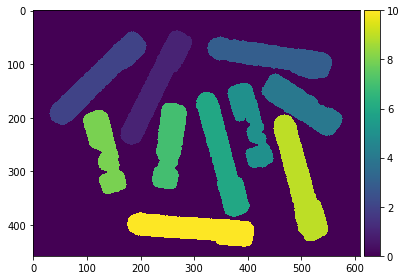

In [16]:
from skimage.measure import label
from skimage.measure import regionprops
labelo = label(filt3, background =False)

regiona = regionprops(labelo)

io.imshow(labelo)

print('The number of reigons is {}'.format(len(regiona)))


In [27]:
#inspiration: 
import skimage as sk
from skimage import measure
#props=sk.measure.regionprops(image)
#maj_ax_le=round(props[0].major_axis_length,3)

pencil=0
glue=0

for i in range (0,len(regiona)):
    length = regiona[i].major_axis_length
    print('Number of {} pixels.'.format(length))
    if length > 250:
        print ('BOARD PEN')
        pencil = pencil+ 1
    else:
        print ('GLUE')
        glue = glue+ 1

print('Number of board pen is {} .'.format(pencil))
print('Number of glue is {} .'.format(glue))

Number of 263.91708260003827 pixels.
BOARD PEN
Number of 257.5257681542593 pixels.
BOARD PEN
Number of 264.8422761297249 pixels.
BOARD PEN
Number of 180.48172660473728 pixels.
GLUE
Number of 193.06415737102714 pixels.
GLUE
Number of 272.45558186743517 pixels.
BOARD PEN
Number of 182.90431914174843 pixels.
GLUE
Number of 183.3059955109408 pixels.
GLUE
Number of 273.0057733799264 pixels.
BOARD PEN
Number of 270.2113862333471 pixels.
BOARD PEN
Number of board pen is 6 .
Number of glue is 4 .
